## Epidemics on Networks
https://epidemicsonnetworks.readthedocs.io/
https://arxiv.org/pdf/2001.02436.pdf

In [1]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from IPython.display import Video

In [2]:
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99

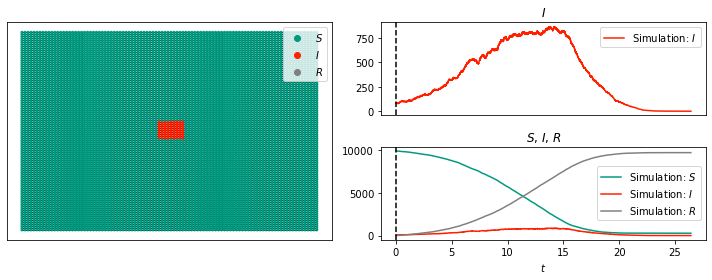

In [3]:
#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
pos = {node:node for node in G}
sim_kwargs = {'pos': pos}
sim = EoN.fast_SIR(G, 2.0, 1.0, initial_infecteds = initial_infections,
               tmax = 40, return_full_data=True, sim_kwargs = sim_kwargs)

ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
ani.save('SIR_2dgrid.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

In [4]:
Video('SIR_2dgrid.mp4')

In [5]:
G = nx.karate_club_graph()

doing Gillespie simulation
done with simulation, now plotting


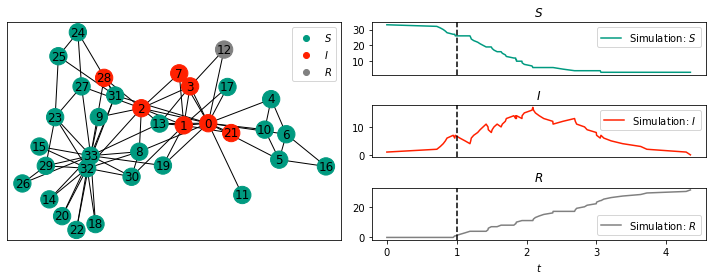

In [6]:
nx_kwargs = {"with_labels":True} #optional arguments to be passed on to the
#networkx plotting command.
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G, 1, 1, return_full_data=True)
print('done with simulation, now plotting')
sim.display(time = 1, **nx_kwargs) #plot at time 1.
plt.show()

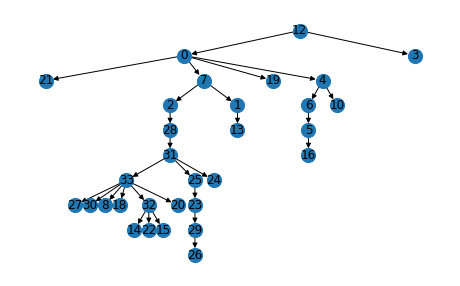

In [7]:
T = sim.transmission_tree() #A networkx DiGraph with the transmission tree
Tpos = EoN.hierarchy_pos(T) #pos for a networkx plot
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
nx.draw(T, Tpos, ax=ax, node_size = 200, with_labels=True)
plt.show()
